In [ ]:
#importing libraries
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import model_from_json
import math 
from sklearn.metrics import mean_squared_error

In [ ]:
#mounting to Google Drive
drive.mount("/content/drive")
path = '/content/drive/My Drive/ML Project/msft.us.txt'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#reading the stock .txt file from https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
msftText = open(path).read()
msftText = msftText.split(sep=',')

In [ ]:
#Processing Dates Data to get it in the right format

rawDates = msftText[0::6]
del rawDates[len(rawDates)-1]

dates = []
for date in rawDates: 
    if date == 'OpenInt\n1986-03-13':
      dates.append(date.replace('OpenInt\n', ''))
    else:
      dates.append(date.replace('0\n', ''))

print(dates)
#print(msftMatrix)

['Date', '1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18', '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24', '1986-03-25', '1986-03-26', '1986-03-27', '1986-03-31', '1986-04-01', '1986-04-02', '1986-04-03', '1986-04-04', '1986-04-07', '1986-04-08', '1986-04-09', '1986-04-10', '1986-04-11', '1986-04-14', '1986-04-15', '1986-04-16', '1986-04-17', '1986-04-18', '1986-04-21', '1986-04-22', '1986-04-23', '1986-04-24', '1986-04-25', '1986-04-28', '1986-04-29', '1986-04-30', '1986-05-01', '1986-05-02', '1986-05-05', '1986-05-06', '1986-05-07', '1986-05-08', '1986-05-09', '1986-05-12', '1986-05-13', '1986-05-14', '1986-05-15', '1986-05-16', '1986-05-19', '1986-05-20', '1986-05-21', '1986-05-22', '1986-05-23', '1986-05-27', '1986-05-28', '1986-05-29', '1986-05-30', '1986-06-02', '1986-06-03', '1986-06-04', '1986-06-05', '1986-06-06', '1986-06-09', '1986-06-10', '1986-06-11', '1986-06-12', '1986-06-13', '1986-06-16', '1986-06-17', '1986-06-18', '1986-06-19', '1986-06-20', '1986-06-23

In [ ]:
#Processing the Rest
#Getting every piece of data in that .txt into a list of floats

#converts a list of strings into a list of floats
def listToFloat(dataList):
  list2 = [float(n) for n in dataList]
  return list2

opening = msftText[7::6]
opening = listToFloat(opening)
print(opening)

high = msftText[8::6]
high = listToFloat(high)
print(high)

low = msftText[9::6]
low = listToFloat(low)
print(low)

close = msftText[10::6]
close = listToFloat(close)
print(close)

volume = msftText[11::6]
volume = listToFloat(volume)
print(volume)

[0.0672, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.0672, 0.0672, 0.0672, 0.0672, 0.07533, 0.07533, 0.0672, 0.07533, 0.07533, 0.07533, 0.0672, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.08389, 0.09222, 0.09222, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.09222, 0.09222, 0.09222, 0.09222, 0.09222, 0.09222, 0.09222, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.07533, 0.07533, 0.08389, 0.08389, 0.08389, 0.08389, 0.07533, 0.07533, 0.07533, 0.0672, 0.0672, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.08389, 0.08389, 0.08389, 0.08389, 0.08389, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.07533, 0.08389, 0.08389, 0.07533, 0.07533, 

In [ ]:
#deleting the first element in dates because it isn't a value we need
del dates[0]

#Pairing an opening date with its corresponding opening value
newDates = dates
print((newDates))
print((opening))

openingList = []
for i in range(len(newDates)):
  y = []
  y.append(newDates[i])
  y.append(opening[i])
  openingList.append(y)  

print(openingList)

['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18', '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24', '1986-03-25', '1986-03-26', '1986-03-27', '1986-03-31', '1986-04-01', '1986-04-02', '1986-04-03', '1986-04-04', '1986-04-07', '1986-04-08', '1986-04-09', '1986-04-10', '1986-04-11', '1986-04-14', '1986-04-15', '1986-04-16', '1986-04-17', '1986-04-18', '1986-04-21', '1986-04-22', '1986-04-23', '1986-04-24', '1986-04-25', '1986-04-28', '1986-04-29', '1986-04-30', '1986-05-01', '1986-05-02', '1986-05-05', '1986-05-06', '1986-05-07', '1986-05-08', '1986-05-09', '1986-05-12', '1986-05-13', '1986-05-14', '1986-05-15', '1986-05-16', '1986-05-19', '1986-05-20', '1986-05-21', '1986-05-22', '1986-05-23', '1986-05-27', '1986-05-28', '1986-05-29', '1986-05-30', '1986-06-02', '1986-06-03', '1986-06-04', '1986-06-05', '1986-06-06', '1986-06-09', '1986-06-10', '1986-06-11', '1986-06-12', '1986-06-13', '1986-06-16', '1986-06-17', '1986-06-18', '1986-06-19', '1986-06-20', '1986-06-23', '1986

In [ ]:
###These functions are used for linear interpolation of unemployment and housing starts.
###Unemployment is calculated on a monthly basis so we had to estimate the unemployment or housing start
###On a given day using linear interpolation

## function to read date from stock value 
def readDateStock(date):
  year = int(date[0:4])
  month = int(date[5:7])
  day = int(date[8:10])
  return year, month, day

##function to read date from list 
def readListDates(datesList): 
  for row in datesList: 
    year, month, day = readDateStock(row[0])

#calculate unemployment at a given day 
def calculateUnemploymentDay(stockVals, unemployment):
  unemploymentVals = []
  for dates in stockVals:
    year, month, day = readDateStock(dates[0])
    for vals in unemployment: 
      year2 = vals[0]
      if year == year2:
        if month != 12: 
          diffUnEm = vals[month+1] - vals[month]
          unEm = ((diffUnEm)/30)*day + vals[month] ## calculate value at given point
          unemploymentVals.append(unEm)
        else: 
          diffUnEm = unemployment[unemployment.index(vals)][1] - vals[month]
          unEm = ((diffUnEm)/30)*day + vals[month]
          unemploymentVals.append(unEm)
  return unemploymentVals

###These two functions prepare our final dataset

def combinelists(stockVals, unemployment): ## function to combine day with unemployment in a single list
  listOfUnemployment = calculateUnemploymentDay(stockVals, unemployment)
  for i in range(len(stockVals)): 
    stockVals[i].append(listOfUnemployment[i])
  return stockVals,listOfUnemployment

#remove date
def removeDate(aggregateList):
  for i in range(len(aggregateList)): 
    del aggregateList[i][0]

In [ ]:
#Unemployment data in lists of 13 elements: Year number then 12 values for each month
#Original data from: https://www.kaggle.com/tunguz/us-monthly-unemployment-rate-1948-present

unemploymentRaw = [[1986.0, 6.7, 7.2, 7.2, 7.1, 7.2, 7.2, 7.0, 6.9, 7.0, 7.0, 6.9, 6.6], [1987.0, 6.6, 6.6, 6.6, 6.3, 6.3, 6.2, 6.1, 6.0, 5.9, 6.0, 5.8, 5.7], [1988.0, 5.7, 5.7, 5.7, 5.4, 5.6, 5.4, 5.4, 5.6, 5.4, 5.4, 5.3, 5.3], [1989.0, 5.4, 5.2, 5.0, 5.2, 5.2, 5.3, 5.2, 5.2, 5.3, 5.3, 5.4, 5.4], [1990.0, 5.4, 5.3, 5.2, 5.4, 5.4, 5.2, 5.5, 5.7, 5.9, 5.9, 6.2, 6.3], [1991.0, 6.4, 6.6, 6.8, 6.7, 6.9, 6.9, 6.8, 6.9, 6.9, 7.0, 7.0, 7.3], [1992.0, 7.3, 7.4, 7.4, 7.4, 7.6, 7.8, 7.7, 7.6, 7.6, 7.3, 7.4, 7.4], [1993.0, 7.3, 7.1, 7.0, 7.1, 7.1, 7.0, 6.9, 6.8, 6.7, 6.8, 6.6, 6.5], [1994.0, 6.6, 6.6, 6.5, 6.4, 6.1, 6.1, 6.1, 6.0, 5.9, 5.8, 5.6, 5.5], [1995.0, 5.6, 5.4, 5.4, 5.8, 5.6, 5.6, 5.7, 5.7, 5.6, 5.5, 5.6, 5.6], [1996.0, 5.6, 5.5, 5.5, 5.6, 5.6, 5.3, 5.5, 5.1, 5.2, 5.2, 5.4, 5.4], [1997.0, 5.3, 5.2, 5.2, 5.1, 4.9, 5.0, 4.9, 4.8, 4.9, 4.7, 4.6, 4.7], [1998.0, 4.6, 4.6, 4.7, 4.3, 4.4, 4.5, 4.5, 4.5, 4.6, 4.5, 4.4, 4.4], [1999.0, 4.3, 4.4, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.2, 4.1, 4.1, 4.0], [2000.0, 4.0, 4.1, 4.0, 3.8, 4.0, 4.0, 4.0, 4.1, 3.9, 3.9, 3.9, 3.9], [2001.0, 4.2, 4.2, 4.3, 4.4, 4.3, 4.5, 4.6, 4.9, 5.0, 5.3, 5.5, 5.7], [2002.0, 5.7, 5.7, 5.7, 5.9, 5.8, 5.8, 5.8, 5.7, 5.7, 5.7, 5.9, 6.0], [2003.0, 5.8, 5.9, 5.9, 6.0, 6.1, 6.3, 6.2, 6.1, 6.1, 6.0, 5.8, 5.7], [2004.0, 5.7, 5.6, 5.8, 5.6, 5.6, 5.6, 5.5, 5.4, 5.4, 5.5, 5.4, 5.4], [2005.0, 5.3, 5.4, 5.2, 5.2, 5.1, 5.0, 5.0, 4.9, 5.0, 5.0, 5.0, 4.9], [2006.0, 4.7, 4.8, 4.7, 4.7, 4.6, 4.6, 4.7, 4.7, 4.5, 4.4, 4.5, 4.4], [2007.0, 4.6, 4.5, 4.4, 4.5, 4.4, 4.6, 4.7, 4.6, 4.7, 4.7, 4.7, 5.0], [2008.0, 5.0, 4.9, 5.1, 5.0, 5.4, 5.6, 5.8, 6.1, 6.1, 6.5, 6.8, 7.3], [2009.0, 7.8, 8.3, 8.7, 9.0, 9.4, 9.5, 9.5, 9.6, 9.8, 10.0, 9.9, 9.9], [2010.0, 9.8, 9.8, 9.9, 9.9, 9.6, 9.4, 9.4, 9.5, 9.5, 9.4, 9.8, 9.3], [2011.0, 9.1, 9.0, 9.0, 9.1, 9.0, 9.1, 9.0, 9.0, 9.0, 8.8, 8.6, 8.5], [2012.0, 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 7.8, 7.8, 7.7, 7.9], [2013.0, 8.0, 7.7, 7.5, 7.6, 7.5, 7.5, 7.3, 7.2, 7.2, 7.2, 6.9, 6.7], [2014.0, 6.6, 6.7, 6.7, 6.2, 6.3, 6.1, 6.2, 6.1, 5.9, 5.7, 5.8, 5.6], [2015.0, 5.7, 5.5, 5.4, 5.4, 5.6, 5.3, 5.2, 5.1, 5.0, 5.0, 5.1, 5.0], [2016.0, 4.9, 4.9, 5.0, 5.0, 4.8, 4.9, 4.8, 4.9, 5.0, 4.9, 4.7, 4.7], [2017.0, 4.7, 4.6, 4.4, 4.4, 4.4, 4.3, 4.3, 4.4, 4.2, 4.1, 4.2, 4.1], [2018.0, 4.1, 4.1, 4.0, 4.0, 3.8, 4.0, 3.8, 3.8, 3.7, 3.8, 3.7, 3.9], [2019.0, 4.0, 3.8, 3.8, 3.6, 3.6, 3.7, 3.7, 3.7, 3.5, 3.6, 3.5, 3.5]]

In [ ]:
#Uses the functions we wrote above to combine our data in 'ordered triplets' [opening, unemployment, housing starts

finalData, soloUnemployment = combinelists(openingList, unemploymentRaw)
removeDate(finalData)
print(finalData)

[[0.0672, 7.156666666666666], [0.07533, 7.153333333333333], [0.07533, 7.1433333333333335], [0.07533, 7.14], [0.07533, 7.136666666666667], [0.07533, 7.133333333333333], [0.07533, 7.13], [0.0672, 7.12], [0.0672, 7.116666666666666], [0.0672, 7.113333333333333], [0.0672, 7.109999999999999], [0.07533, 7.096666666666667], [0.07533, 7.103333333333333], [0.0672, 7.1066666666666665], [0.07533, 7.109999999999999], [0.07533, 7.113333333333333], [0.07533, 7.123333333333333], [0.0672, 7.126666666666666], [0.07533, 7.13], [0.07533, 7.133333333333333], [0.07533, 7.136666666666667], [0.07533, 7.1466666666666665], [0.07533, 7.15], [0.07533, 7.153333333333333], [0.07533, 7.156666666666666], [0.07533, 7.16], [0.07533, 7.17], [0.07533, 7.173333333333334], [0.07533, 7.176666666666667], [0.07533, 7.18], [0.08389, 7.183333333333334], [0.09222, 7.193333333333333], [0.09222, 7.196666666666667], [0.08389, 7.2], [0.08389, 7.2], [0.08389, 7.2], [0.08389, 7.2], [0.08389, 7.2], [0.08389, 7.2], [0.08389, 7.2], [0.08

7983
7983


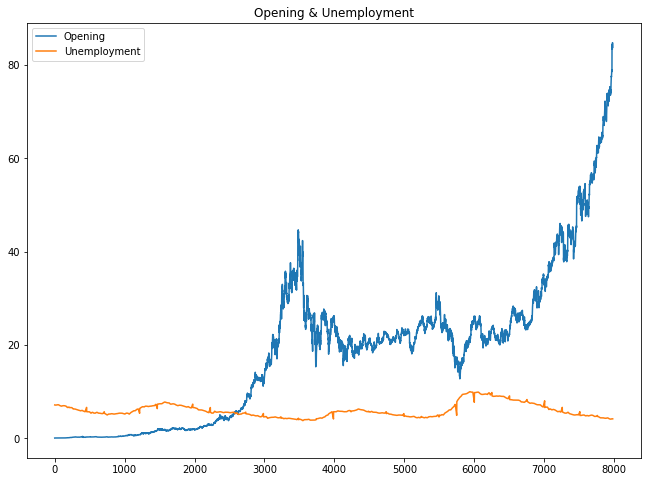

In [ ]:
#plotting the opening, unemployment
#the y-axis is arbitrary, it has no meaning

print(len(opening))
print(len(soloUnemployment))

plt.figure(figsize=(11,8))

plt.plot(opening)
plt.plot(soloUnemployment)
plt.title('Opening & Unemployment')
plt.legend(['Opening', 'Unemployment'], loc='upper left')
plt.show()

In [ ]:
#MinMax scaling data between 0 and 1
#LSTMs require the data to be normalized like this
scaler = MinMaxScaler(feature_range=(0,1))
finalData2 = scaler.fit_transform(np.array(finalData).reshape(-1,1))
print(finalData2)
print(len(finalData2))

[[0.00000000e+00]
 [8.36981383e-02]
 [9.59826594e-05]
 ...
 [4.84375959e-02]
 [9.88430135e-01]
 [4.83982426e-02]]
15966


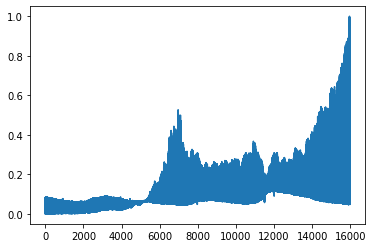

In [ ]:
plt.plot(finalData2)

In [ ]:
#Split train and test data
dataSegment = finalData2[6000:14000]
print(len(dataSegment), 'data points')

training_size = int(len(dataSegment)*.7) #70% of data will be training data
test_size = len(dataSegment)-training_size #The rest will be test data

train_data = dataSegment[0:training_size] 
test_data = dataSegment[training_size:len(dataSegment)]

print(len(train_data))
print(len(test_data))

8000 data points
5600
2400


In [ ]:
#Creating the usable matrix using a time step which is important for time series

#Function adapted from https://github.com/krishnaik06/Stock-MArket-Forecasting
#Most following logic was also adapted from that github

#Creates an x and y dataset using a timestep. 
#The number of columns is the time step size
#The number of rows is the length of train/test data - (time step)
def createDataset(dataset, timeStep):
  dataX, dataY = [], []
  for i in range(len(dataset) - timeStep):
    a = dataset[i:(i + timeStep), 0]
    dataX.append(a)
    dataY.append(dataset[i + timeStep, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#Setting time step to 150 and creating the x and y train and test data
timeStep = 150
x_train, y_train = createDataset(train_data, timeStep)
x_test, y_test = createDataset(test_data, timeStep)

print(x_train)
print(y_train)


print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

[[0.15325113 0.05351417 0.15452618 ... 0.0514678  0.19049902 0.05158586]
 [0.05351417 0.15452618 0.05351417 ... 0.19049902 0.05158586 0.18402934]
 [0.15452618 0.05351417 0.15731239 ... 0.05158586 0.18402934 0.05162521]
 ...
 [0.08342267 0.17740618 0.08361943 ... 0.16414806 0.10321737 0.16772527]
 [0.17740618 0.08361943 0.19620131 ... 0.10321737 0.16772527 0.10333543]
 [0.08361943 0.19620131 0.08420973 ... 0.16772527 0.10333543 0.16731206]]
[0.18402934 0.05162521 0.19610686 ... 0.10333543 0.16731206 0.10345349]
(5450, 150)
(5450,)
(2250, 150)
(2250,)


In [ ]:
#Reshape input so the LSTM model can use it

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Stacking our sequential model with a mse loss function and adam optimizer
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
model1 = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
86/86 [==============================] - 22s 255ms/step - loss: 0.0133 - accuracy: 0.0000e+00 - val_loss: 0.0105 - val_accuracy: 0.0000e+00
Epoch 2/100
86/86 [==============================] - 24s 279ms/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 3/100
86/86 [==============================] - 24s 278ms/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 4/100
86/86 [==============================] - 24s 281ms/step - loss: 0.0132 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 5/100
86/86 [==============================] - 24s 279ms/step - loss: 0.0130 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 6/100
86/86 [==============================] - 24s 279ms/step - loss: 0.0130 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 7/100
86/86 [==============================] - 24s 281ms/step - loss: 0.0130 - acc

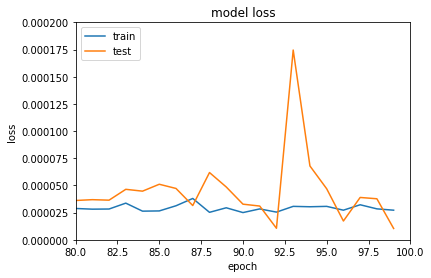

In [ ]:
#Plotting loss of train and test set
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([80, 100, 0, .0002])
plt.show()

In [ ]:
#Creating our prediction sets of data we trained on
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Change back into original values instead of 0-1
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE
#print(math.sqrt(mean_squared_error(y_train,train_predict)))
#print(math.sqrt(mean_squared_error(y_test,test_predict)))

23.498730917422744
24.429738835937897


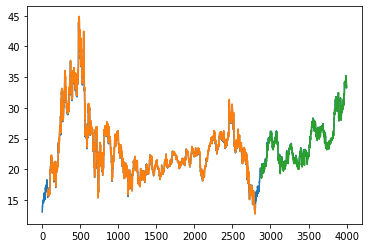

In [ ]:
#Plotting train/test predictions over original data
# shift train predictions for plotting
look_back=150
trainPredictPlot = np.empty_like(dataSegment)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataSegment)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(dataSegment), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataSegment)[0::2])
plt.plot(trainPredictPlot[0::2])
plt.plot(testPredictPlot[0::2])
plt.show()

In [ ]:
#Reshaping x input
x_input=test_data[2250:].reshape(1,-1)
x_input.shape

(1, 150)

In [ ]:
#Putting that data in a list
temp_input=list(x_input)
print(len(temp_input[0]))
temp_input=temp_input[0].tolist()
print(len(temp_input))

150
150


In [ ]:
#Predict the Next 30 Days
#Function adapted from https://github.com/krishnaik06/Stock-MArket-Forecasting

lst_output=[]
n_steps=150
i=0

print(np.array(temp_input).shape)
print(temp_input)
while(i<60): #Will predict 30 days of opening data
    
    if(len(temp_input)>150): #150 corresponds to time step
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

(151,)
[0.07870027122283246, 0.40135391037840545, 0.07862156465508421, 0.40135391037840545, 0.07854285808733596, 0.4040220630250712, 0.07838544495183945, 0.4069145293898194, 0.07932992376481848, 0.40744579872212017, 0.07984151645518212, 0.40818957578734116, 0.08035310914554576, 0.41504885316660134, 0.08086470183590941, 0.41043271296816636, 0.08137629452627304, 0.411955685054095, 0.08291107259736395, 0.4123807005199356, 0.0834226652877276, 0.4065721558201146, 0.08393425797809125, 0.4020858814584642, 0.08444585066845488, 0.39972468442601655, 0.08495744335881852, 0.39181467436731726, 0.08649222142990945, 0.39471894671722774, 0.08700381412027308, 0.3946763277053833, 0.08766695111989975, 0.39476555585861206, 0.08779491484165192, 0.39450138807296753, 0.08769740164279938, 0.3941814601421356, 0.08758784830570221, 0.39397430419921875, 0.08757860958576202, 0.3938940763473511, 0.08767133206129074, 0.39387673139572144, 0.08781420439481735, 0.3938613533973694, 0.0879579558968544, 0.3938232064247131

In [ ]:
#Creating the x axis values for plotting
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
print(len(dataSegment))

8000


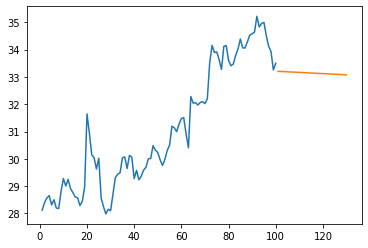

In [ ]:
#Plotting Prediction
plt.plot(day_new,scaler.inverse_transform(dataSegment[7800:])[0::2])

plt.plot(day_pred,scaler.inverse_transform(lst_output)[0::2])

In [ ]:
#Connecting the orange and blue lines^^^
#Extending the orange line data onto predictionData
predictionData = dataSegment.tolist()
predictionData.extend(lst_output)

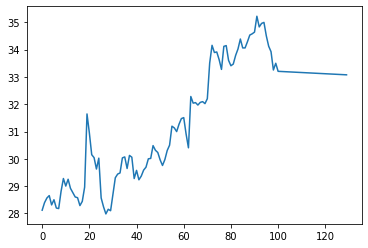

In [ ]:
#Plotting the connected line
plt.plot(scaler.inverse_transform(predictionData[7800:])[0::2])

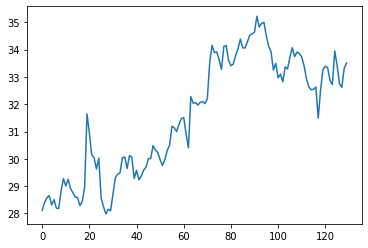

In [ ]:
#Plotting original data for comparison
plt.plot(opening[6900:7030])

In [ ]:
#Calculating and printing errors
#'Base error' is if a human was saying, "tomorrow will be the same as today"

baseError = 0
sum = 0
for i in range (30):
  baseError = (opening[6999 + i + 1] - opening[6999 + i])**2
  #print(i)
  sum += baseError

print('Base RMSE:', math.sqrt(sum/30))
print('Model RMSE:', math.sqrt(mean_squared_error(opening[6999:7029], scaler.inverse_transform(predictionData[8000:][0::2]))))

Base RMSE: 0.5020597573994546
Model RMSE: 0.5500736982905305


In [ ]:
#Took the thirty prediction days and put it into a list for convenience
thirtyPredictionDays = [[33.20570759],[33.20131019],[33.19691279],[33.19251287],[33.18811799],[33.18370797],[33.17930805],[33.17489802],[33.17049305],[33.16609312],[33.16169068],[33.15729075],[33.15288325],[33.14848585],[33.14407583],[33.13966076],[33.13524821],[33.13083819],[33.12641807],[33.1219929 ],[33.11757026],[33.11314509],[33.10871992],[33.10429728],[33.09986706],[33.09543684],[33.0910142 ],[33.0865966 ],[33.08216639],[33.07774122]]

In [ ]:
#Error over 15 day prediction
baseError = 0
sum = 0
for i in range (15):
  baseError = (opening[6999 + i + 1] - opening[6999 + i])**2
  #print(i)
  sum += baseError

print('Base RMSE:', math.sqrt(sum/15))
print('Model RMSE:', math.sqrt(mean_squared_error(opening[6999:7014], thirtyPredictionDays[0:30][0::2])))

Base RMSE: 0.32461690241472735
Model RMSE: 0.5006881187909202


In [ ]:
#Error over First 5 day prediction
baseError = 0
sum = 0
for i in range (5):
  baseError = (opening[6999 + i + 1] - opening[6999 + i])**2
  #print(i)
  sum += baseError

print('Base RMSE:', math.sqrt(sum/5))
print('Model RMSE:', math.sqrt(mean_squared_error(opening[6999:7004], thirtyPredictionDays[0:10][0::2])))

Base RMSE: 0.373417460759402
Model RMSE: 0.25248478965036203


In [ ]:
#Error over Second 5 day prediction
baseError = 0
sum = 0
for i in range (5):
  baseError = (opening[7004 + i + 1] - opening[7004 + i])**2
  #print(i , ', baseError: ' , baseError)
  sum += baseError

print('Base RMSE:', math.sqrt(sum/5))
print('Model RMSE:', math.sqrt(mean_squared_error(opening[7004:7009], thirtyPredictionDays[10:20][0::2])))

Base RMSE: 0.2972174288294659
Model RMSE: 0.6618283721767056


In [ ]:
#Error over Third 5 day prediction
baseError = 0
sum = 0
for i in range (5):
  baseError = (opening[7009 + i + 1] - opening[7009 + i])**2
  #print(i , ', baseError: ' , baseError)
  sum += baseError

print('Base RMSE:', math.sqrt(sum/5))
print('Model RMSE:', math.sqrt(mean_squared_error(opening[7009:7014], thirtyPredictionDays[20:30][0::2])))

Base RMSE: 0.2972366060901646
Model RMSE: 0.5003003234781248
